# Monetary Policy Rules

*By Nathan Ramos, CFA*

Monetary policy rules are essential tools for central banks to guide their policy actions and achieve macroeconomic objectives such as stable inflation and low unemployment. This notebook serves as a comprehensive guide to three commonly used monetary policy rules: the Taylor Rule, the Balanced Approach Rule, and the First Difference Rule. By comparing these rules, we aim to understand their different approaches and implications for economic policy.

We will start by importing the necessary libraries and modules, configuring the system path, and setting up the environment for our analysis using the `pyeconomics` package.

In [1]:
# Import standard libraries
import sys
import os
from datetime import datetime

# Configure system path
sys.path.insert(0, os.path.abspath('../../'))

# Import third-party libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import pyeconomics modules
from pyeconomics import taylor_rule as tr
from pyeconomics import balanced_approach_rule as bar
from pyeconomics import first_difference_rule as fdr
from pyeconomics import fetch_historical_fed_funds_rate
from pyeconomics import fred_client
from pyeconomics import verbose_taylor_rule

# Set up display for plots
%matplotlib inline

## Defining Economic Data Series

To apply the monetary policy rules, we need to gather relevant economic data. The Federal Reserve Economic Data (FRED) database provides a rich source of economic data that we can use for our analysis. In this section, we define the FRED series IDs for the following economic indicators:

- **Inflation Rate**: Measured by the Trimmed Mean PCE Inflation Rate.
- **Unemployment Rate**: The general unemployment rate in the economy.
- **Natural Rate of Unemployment**: The long-term rate of unemployment determined by structural factors in the economy.
- **Real Interest Rate**: The inflation-adjusted interest rate, represented by the 10-Year Treasury Inflation-Indexed Security.

Before proceeding, ensure you have configured access to the FRED API by following the [API configuration guide](fred_api_configuration.ipynb). This guide provides step-by-step instructions on obtaining and securely storing your FRED API key.

We will print the series names and their corresponding IDs to ensure that we are using the correct data for our analysis.

In [2]:
# FRED Series IDs for economic data
inflation_series_id = 'PCETRIM12M159SFRBDAL'
unemployment_rate_series_id = 'UNRATE'
natural_unemployment_series_id = 'NROU'
real_interest_rate_series_id = 'DFII10'

# Print the series names and their IDs
print(f"Inflation Series ID:               {fred_client.get_series_name(inflation_series_id)}")
print(f"Unemployment Rate Series ID:       {fred_client.get_series_name(unemployment_rate_series_id)}")
print(f"Natural Unemployment Series ID:    {fred_client.get_series_name(natural_unemployment_series_id)}")
print(f"Real Interest Rate Series ID:      {fred_client.get_series_name(real_interest_rate_series_id)}")

Inflation Series ID:               Trimmed Mean PCE Inflation Rate
Unemployment Rate Series ID:       Unemployment Rate
Natural Unemployment Series ID:    Noncyclical Rate of Unemployment
Real Interest Rate Series ID:      Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed


## Calculating Policy Rule Estimates Using FRED Data

In this section, we will calculate the estimates for various monetary policy rules using real-time data fetched from the FRED database. We will use the following policy rules:

- **Taylor Rule**: A widely used rule that prescribes the federal funds rate based on the inflation rate, the output gap, and the neutral interest rate.
- **Balanced Approach Rule**: Similar to the Taylor Rule but gives equal weight to stabilizing inflation and unemployment.
- **Balanced Approach (Shortfalls) Rule**: A variation of the Balanced Approach Rule that emphasizes shortfalls in employment.
- **First Difference Rule**: Focuses on changes in the federal funds rate rather than its level, reacting to deviations in inflation and unemployment from their targets.

Additionally, we will fetch and display the current Federal Funds Rate to provide a benchmark for comparison with the policy rule estimates. After calculating the estimates for each monetary policy rule, we will compile the results into a single table for easy comparison.

In [3]:
# Current Taylor Rule calculation using FRED data
tr_estimate = tr.taylor_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id
)

In [4]:
# Current Balanced Approach Rule calculation using FRED data
bar_estimate = bar.balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id
)

In [5]:
# Current Balanced Approach (Shortfalls) Rule calculation using FRED data
basr_estimate = bar.balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    use_shortfalls_rule=True
)

In [6]:
# Current Balanced Approach Rule calculation using FRED data
fdr_estimate = fdr.first_difference_rule(
    inflation_series_id=inflation_series_id,
    unemployment_rate_series_id=unemployment_rate_series_id,
    natural_unemployment_series_id=natural_unemployment_series_id
)

In [7]:
# Federal Funds Rate using FRED data
historical_fed_rate = fetch_historical_fed_funds_rate()
current_fed_rate = historical_fed_rate.iloc[-1]

In [8]:
estimates = pd.DataFrame(
    data=[
        tr_estimate,
        bar_estimate,
        basr_estimate,
        fdr_estimate
    ], columns=['Estimate (%)'], 
    index=[
        'Taylor Rule (TR)',
        'Balanced Approach Rule (BAR)',
        'Balanced Approach Shortfalls Rule (BASR)',
        'First Difference Rule (FDR)'
    ])

In [9]:
# Formatting and printing the verbose output
as_of_date = datetime.now().strftime("%B %d, %Y")
print("")
print("┌─────────────────────────────────────────────────────────────────────┐")
print("│                     Interest Rate Policy Estimates                  │")
print("├─────────────────────────────────────────────────────────────────────┤")
for rule, row in estimates.iterrows():
    print(f"│ {rule:55} {row['Estimate (%)']:.2f}%       │")
print("├─────────────────────────────────────────────────────────────────────┤")
ffr_description = "Federal Funds Rate (FFR)"
ffr_value = f"{current_fed_rate:.2f}%       "
print(f"│ {ffr_description:<55} {ffr_value:>11}│")
print("├─────────────────────────────────────────────────────────────────────┤")
print(f"│ {'As of Date: '}{as_of_date:>49}       │")
print("└─────────────────────────────────────────────────────────────────────┘")
print("")


┌─────────────────────────────────────────────────────────────────────┐
│                     Interest Rate Policy Estimates                  │
├─────────────────────────────────────────────────────────────────────┤
│ Taylor Rule (TR)                                        6.23%       │
│ Balanced Approach Rule (BAR)                            6.74%       │
│ Balanced Approach Shortfalls Rule (BASR)                5.72%       │
│ First Difference Rule (FDR)                             5.97%       │
├─────────────────────────────────────────────────────────────────────┤
│ Federal Funds Rate (FFR)                                5.50%       │
├─────────────────────────────────────────────────────────────────────┤
│ As of Date:                                      May 15, 2024       │
└─────────────────────────────────────────────────────────────────────┘



## Analysis of Policy Rule Estimates

The table above presents the interest rate policy estimates calculated using different monetary policy rules, alongside the current Federal Funds Rate (FFR). Each rule provides a unique prescription for the federal funds rate based on the economic conditions captured by the FRED data.

- **Taylor Rule (TR)**: Suggests an interest rate of 6.23%. The Taylor Rule typically responds to deviations of inflation from its target and the output gap.
- **Balanced Approach Rule (BAR)**: Recommends a slightly higher rate of 6.74%, balancing inflation stabilization and unemployment reduction.
- **Balanced Approach Shortfalls Rule (BASR)**: Proposes a rate of 5.72%, placing greater emphasis on employment shortfalls.
- **First Difference Rule (FDR)**: Estimates a rate of 5.97%, focusing on changes in economic indicators rather than their levels.

### Key Insights

- The Taylor Rule and the Balanced Approach Rule suggest significantly higher rates compared to the Balanced Approach Shortfalls Rule and the First Difference Rule, reflecting their different weighting of economic factors.
- The current Federal Funds Rate (FFR) of 5.50% is close to the estimates provided by the Balanced Approach Shortfalls Rule and the First Difference Rule, indicating a more cautious and conservative approach in current monetary policy.
- The unadjusted rule estimates generally propose higher interest rates, suggesting a more aggressive stance to counter potential inflationary pressures.

### Policy Recommendation

Based on the unadjusted estimates, a recommended policy action would be to consider a modest increase in the federal funds rate by 0.25%. The estimates from the Balanced Approach Shortfalls Rule (5.72%) and the First Difference Rule (5.97%) suggest that a quarter-point increase would help address inflationary pressures while supporting employment and economic stability.

### Implications for Monetary Policy

- **Aggressive Policy Stance**: The higher rates suggested by the Taylor Rule and Balanced Approach Rule indicate a potential need for a more aggressive policy stance to curb inflation.
- **Balancing Inflation and Employment**: The Balanced Approach Shortfalls Rule and the First Difference Rule provide a more balanced approach, emphasizing both inflation control and employment support.
- **Diverse Perspectives**: Comparing different rules provides diverse perspectives on appropriate policy actions, helping policymakers weigh various economic objectives.

In the following sections, we will visualize these estimates and further explore their implications for economic stability and growth.

# Historical Policy Rule Estimates

In this section, we calculate the historical estimates for the various monetary policy rules using past data from the FRED database. By examining historical estimates, we can gain insights into how different rules would have prescribed policy actions over time under varying economic conditions. We will compile these historical estimates into a single DataFrame for comparison and analysis.

In [10]:
# Historical Taylor Rule calculation using FRED data
historical_tr = tr.historical_taylor_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
)

In [11]:
# Historical BAR calculation using FRED data
historical_bar = bar.historical_balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id
)

In [12]:
# Historical BASR calculation using FRED data
historical_basr = bar.historical_balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    use_shortfalls_rule=True
)

In [13]:
# Historical First Difference Rule (FDR) calculation using FRED data
historical_fdr = fdr.historical_first_difference_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id
)

In [14]:
historical_rates = pd.concat([
    historical_tr['TaylorRule'],
    historical_bar['BalancedApproachRule'],
    historical_basr['BalancedApproachShortfallsRule'],
    historical_fdr['FirstDifferenceRule'],
    historical_fed_rate
], axis=1)

## Visualizing Historical Policy Rule Estimates

To better understand the historical behavior of the different monetary policy rules, we will visualize their estimates alongside the Federal Funds Rate over time. 

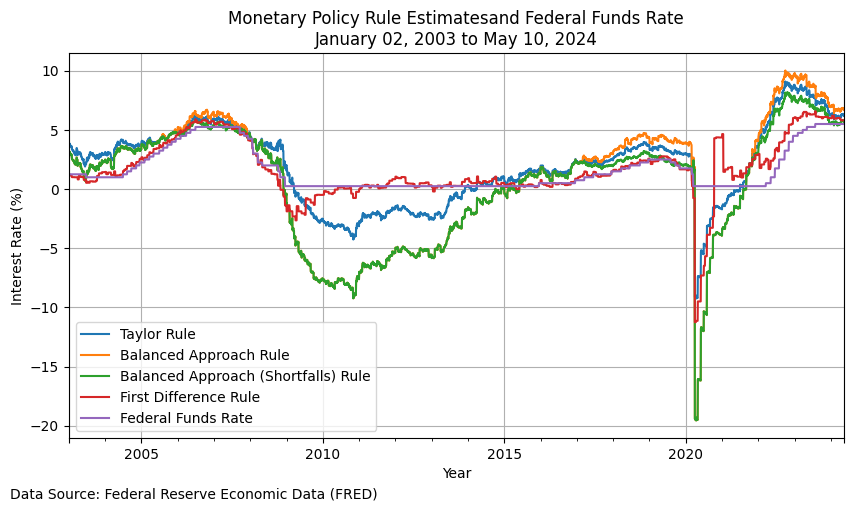

In [15]:
# Extracting the time range from the data
start_date = historical_rates.dropna().index.min()
end_date = historical_rates.dropna().index.max()
date_range = f"{start_date.strftime('%B %d, %Y')} to {end_date.strftime('%B %d, %Y')}"

# Plotting Policy Rules and the Federal Funds Rate
historical_rates[[
    'TaylorRule',
    'BalancedApproachRule',
    'BalancedApproachShortfallsRule',
    'FirstDifferenceRule',
    'FedRate'
]].dropna().plot(
    figsize=(10, 5),  # Specifies the figure size
    grid=True  # Enables grid lines for better readability
)

plt.title(f'Monetary Policy Rule Estimates'
          f'and Federal Funds Rate\n{date_range}')

plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.legend([
    'Taylor Rule',
    'Balanced Approach Rule',
    'Balanced Approach (Shortfalls) Rule',
    'First Difference Rule',
    'Federal Funds Rate'
])

# Adding the citation as a footnote
plt.figtext(
    x=0.25,
    y=-0.01,
    s="Data Source: Federal Reserve Economic Data (FRED)", 
    ha="center"
)

plt.show()  # Display the plot

## Interpretation of Historical Policy Rule Estimates

The plot above shows the historical estimates of various monetary policy rules alongside the actual Federal Funds Rate (FFR) from January 2, 2003, to May 10, 2024. Each line represents the interest rate prescribed by a different rule based on historical economic data.

### Key Observations

- **Taylor Rule (TR)**: The Taylor Rule estimates generally align closely with the Federal Funds Rate, reflecting its responsiveness to both inflation and output gap changes.
- **Balanced Approach Rule (BAR)**: The BAR often suggests higher rates compared to the Taylor Rule, indicating a stronger emphasis on both inflation and unemployment stabilization.
- **Balanced Approach Shortfalls Rule (BASR)**: The BASR, which focuses more on employment shortfalls, tends to prescribe slightly lower rates during periods of economic slack.
- **First Difference Rule (FDR)**: The FDR shows more volatile estimates, reacting to changes in economic indicators rather than their levels.

### Analysis

- **Policy Responsiveness**: The Taylor Rule and BAR show a steady response to economic conditions, while the FDR's volatility highlights its sensitivity to economic changes.
- **Economic Crises**: During the 2008 financial crisis and the COVID-19 pandemic, all rules showed significant rate reductions, but with varying magnitudes and timing, reflecting different underlying assumptions and priorities.
- **Recent Trends**: In recent years, the estimates have converged closer to the actual FFR, suggesting that the Federal Reserve's current policy actions are in line with traditional rule-based prescriptions.

### Implications for Policymakers

- **Diverse Perspectives**: Comparing different rules provides diverse perspectives on appropriate policy actions, helping policymakers balance multiple economic objectives.
- **Rule Selection**: The choice of rule can significantly impact the prescribed interest rate, highlighting the importance of selecting a rule that aligns with current economic priorities.

In the next section, we will explore adjusted policy rules by computing the estimates with certain adjustments and discussing their implications for monetary policy.

## Adjusted Policy Rules

In this section, we will compute the monetary policy rule estimates with certain adjustments to account for policy inertia and the effective lower bound (ELB). These adjustments help us understand how the rules behave under more realistic central bank policy constraints.

### Adjustment Parameters

- **Policy Inertia (ρ)**: The policy inertia coefficient (ρ) reflects the degree to which the central bank gradually adjusts the interest rate towards the target rate prescribed by the rule. A value of 0.0 means no inertia (immediate adjustment), while a value of 1.0 means full inertia (gradual adjustment). For this analysis, we set ρ to 0.7, indicating significant but not complete inertia.
- **Effective Lower Bound (ELB)**: The ELB represents the lowest possible interest rate set by the central bank to avoid negative rates or other undesirable effects. By setting `apply_elb` to `True`, we ensure that the estimates do not fall below this lower bound.

Let's proceed to calculate the adjusted estimates for each policy rule using these parameters.

In [16]:
# Adjustment Parameters
rho = 0.7
apply_elb = True

### Calculating Adjusted Policy Rule Estimates

Using the adjustment parameters specified, we now calculate the estimates for each monetary policy rule with adjustments for policy inertia and the effective lower bound (ELB). These adjusted estimates provide a more realistic view of how central banks might implement these rules in practice.

The adjusted calculations will be performed as follows:

- **Adjusted Taylor Rule (TR)**: Incorporates policy inertia and the ELB into the Taylor Rule estimate.
- **Adjusted Balanced Approach Rule (BAR)**: Applies the same adjustments to the Balanced Approach Rule.
- **Adjusted Balanced Approach Shortfalls Rule (BASR)**: Includes the adjustments for the shortfalls-focused rule.
- **Adjusted First Difference Rule (FDR)**: Adjusts the First Difference Rule estimate accordingly.

After computing these adjusted estimates, we will compile them into a DataFrame and display the results in a formatted table for comparison with the current Federal Funds Rate (FFR).

In [17]:
# Current Adjusted Taylor Rule calculation using FRED data
adj_tr_estimate = tr.taylor_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    rho=rho,
    apply_elb=apply_elb
)

In [18]:
# Current Adjusted Balanced Approach Rule calculation using FRED data
adj_bar_estimate = bar.balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    rho=rho,
    apply_elb=apply_elb
)

In [19]:
# Current Adjusted Balanced Approach (Shortfalls) Rule calculation using FRED data
adj_basr_estimate = bar.balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    use_shortfalls_rule=True,
    rho=rho,
    apply_elb=apply_elb
)

In [20]:
# Current Adjusted Balanced Approach Rule calculation using FRED data
adj_fdr_estimate = fdr.first_difference_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    rho=rho,
    apply_elb=apply_elb
)

In [21]:
adj_estimates = pd.DataFrame(
    data=[
        adj_tr_estimate,
        adj_bar_estimate,
        adj_basr_estimate,
        adj_fdr_estimate
    ], columns=['Estimate (%)'], 
    index=[
        'Adjusted Taylor Rule (TR)',
        'Adjusted Balanced Approach Rule (BAR)',
        'Adjusted Balanced Approach Shortfalls Rule (BASR)',
        'Adjusted First Difference Rule (FDR)'
    ])

In [22]:
# Formatting and printing the verbose output
as_of_date = datetime.now().strftime("%B %d, %Y")
print("")
print("┌─────────────────────────────────────────────────────────────────────┐")
print("│                Adjusted Interest Rate Policy Estimates              │")
print("├─────────────────────────────────────────────────────────────────────┤")
for rule, row in adj_estimates.iterrows():
    print(f"│ {rule:55} {row['Estimate (%)']:.2f}%       │")
print("├─────────────────────────────────────────────────────────────────────┤")
ffr_description = "Federal Funds Rate (FFR)"
ffr_value = f"{current_fed_rate:.2f}%       "
print(f"│ {ffr_description:<55} {ffr_value:>11}│")
print("├─────────────────────────────────────────────────────────────────────┤")
print(f"│ {'As of Date: '}{as_of_date:>49}       │")
print("└─────────────────────────────────────────────────────────────────────┘")
print("")


┌─────────────────────────────────────────────────────────────────────┐
│                Adjusted Interest Rate Policy Estimates              │
├─────────────────────────────────────────────────────────────────────┤
│ Adjusted Taylor Rule (TR)                               5.72%       │
│ Adjusted Balanced Approach Rule (BAR)                   5.87%       │
│ Adjusted Balanced Approach Shortfalls Rule (BASR)       5.57%       │
│ Adjusted First Difference Rule (FDR)                    5.64%       │
├─────────────────────────────────────────────────────────────────────┤
│ Federal Funds Rate (FFR)                                5.50%       │
├─────────────────────────────────────────────────────────────────────┤
│ As of Date:                                      May 15, 2024       │
└─────────────────────────────────────────────────────────────────────┘



## Analysis of Adjusted Policy Rule Estimates

The table above presents the adjusted interest rate policy estimates calculated using different monetary policy rules, alongside the current Federal Funds Rate (FFR). Each rule incorporates adjustments for policy inertia (ρ = 0.7) and the effective lower bound (ELB), providing a more realistic perspective on how central banks might implement these rules.

### Key Observations

- **Adjusted Taylor Rule (TR)**: Suggests an interest rate of 5.72%, slightly lower than its unadjusted estimate due to the adjustments for inertia and the ELB.
- **Adjusted Balanced Approach Rule (BAR)**: Recommends a rate of 5.87%, also slightly lower than its unadjusted counterpart, balancing inflation stabilization and unemployment reduction with the adjustments.
- **Adjusted Balanced Approach Shortfalls Rule (BASR)**: Proposes a rate of 5.57%, reflecting a cautious approach that places greater emphasis on employment shortfalls.
- **Adjusted First Difference Rule (FDR)**: Estimates a rate of 5.64%, considering changes in economic indicators with the adjustments applied.

### Key Insights

- The adjusted estimates for all rules are close to the current Federal Funds Rate (FFR) of 5.50%, indicating that the adjustments for policy inertia and the ELB bring the prescribed rates more in line with recent central bank actions.
- The proximity of the adjusted estimates to the current FFR suggests that only a small rate adjustment might be needed. Specifically, most rules suggest a modest increase of about 0.25% to 0.37% in the federal funds rate.
- The adjustments have a moderating effect, reducing the volatility and extremity of the unadjusted rule estimates, and leading to more conservative policy prescriptions.

### Policy Recommendation

Based on these adjusted estimates, the Federal Reserve might consider raising the federal funds rate by a quarter-point to align with the suggested rates of 5.57% to 5.87%. This incremental increase would be consistent with the cautious approach indicated by the adjusted rules, addressing potential inflationary pressures while supporting economic stability.

### Implications for Monetary Policy

- **Realistic Implementation**: The adjusted estimates provide a more realistic view of how central banks might implement these policy rules, considering practical constraints and gradual adjustments.
- **Policy Alignment**: The proximity of the adjusted estimates to the current FFR suggests that recent policy actions by the Federal Reserve are consistent with these adjusted rule-based prescriptions.
- **Strategic Considerations**: Policymakers can use these adjusted estimates to better understand the potential impacts of different policy approaches under realistic conditions, aiding in the formulation of more effective and balanced monetary policies.

By incorporating policy inertia and the ELB into the estimates, we gain valuable insights into the practical application of monetary policy rules. In the following sections, we will further explore these adjusted estimates and their implications for future monetary policy decisions.


## Historical Adjusted Policy Rules

In this section, we calculate the historical estimates for the various monetary policy rules with adjustments for policy inertia (ρ = 0.7) and the effective lower bound (ELB). By examining the adjusted historical estimates, we can gain insights into how these rules would have prescribed policy actions over time under more realistic central bank policy constraints.

The following historical adjusted calculations will be performed:

- **Adjusted Historical Taylor Rule Estimates**: Incorporates policy inertia and the ELB into the historical Taylor Rule estimates.
- **Adjusted Historical Balanced Approach Rule (BAR) Estimates**: Applies the same adjustments to the historical Balanced Approach Rule.
- **Adjusted Historical Balanced Approach Shortfalls Rule (BASR) Estimates**: Includes the adjustments for the shortfalls-focused rule in the historical context.
- **Adjusted Historical First Difference Rule (FDR) Estimates**: Adjusts the historical First Difference Rule estimates accordingly.

We will compile these historical adjusted estimates into a single DataFrame for comparison and analysis.

In [23]:
# Adjusted Historical Taylor Rule calculation using FRED data
adj_historical_tr = tr.historical_taylor_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    rho=rho,
    apply_elb=apply_elb
)

In [24]:
# Adjusted Historical BAR calculation using FRED data
adj_historical_bar = bar.historical_balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    rho=rho,
    apply_elb=apply_elb
)

In [25]:
# Adjusted Historical BASR calculation using FRED data
adj_historical_basr = bar.historical_balanced_approach_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    real_interest_rate_series_id,
    use_shortfalls_rule=True,
    rho=rho,
    apply_elb=apply_elb
)

In [26]:
# Historical Adjusted First Difference Rule (FDR) calculation using FRED data
adj_historical_fdr = fdr.historical_first_difference_rule(
    inflation_series_id,
    unemployment_rate_series_id,
    natural_unemployment_series_id,
    rho=rho,
    apply_elb=apply_elb
)

In [27]:
adj_historical_rates = pd.concat([
    adj_historical_tr['AdjustedTaylorRule'],
    adj_historical_bar['AdjustedBalancedApproachRule'],
    adj_historical_basr['AdjustedBalancedApproachShortfallsRule'],
    adj_historical_fdr['AdjustedFirstDifferenceRule'],
    historical_fed_rate
], axis=1)

## Visualizing Historical Adjusted Policy Rule Estimates

To understand the impact of policy inertia and the effective lower bound (ELB) over time, we will visualize the historical adjusted estimates of the various monetary policy rules alongside the Federal Funds Rate. This visualization will help us compare the adjusted policy prescriptions under realistic central bank policy constraints. By examining these plots, we can gain insights into how the adjusted policy rules would have guided interest rate decisions under historical economic conditions.

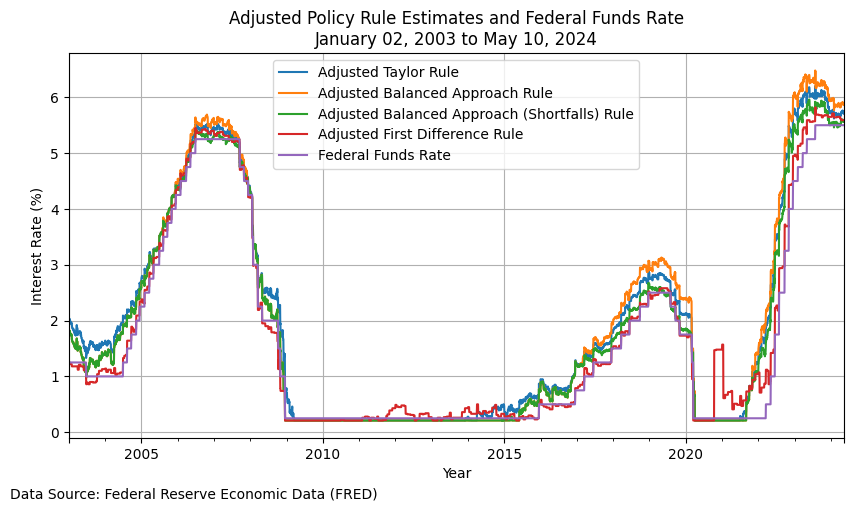

In [28]:
# Extracting the time range from the data
start_date = adj_historical_rates.dropna().index.min()
end_date = adj_historical_rates.dropna().index.max()
date_range = f"{start_date.strftime('%B %d, %Y')} to {end_date.strftime('%B %d, %Y')}"

# Plotting Adjusted Policy Rules and the Federal Funds Rate
adj_historical_rates[[
    'AdjustedTaylorRule',
    'AdjustedBalancedApproachRule',
    'AdjustedBalancedApproachShortfallsRule',
    'AdjustedFirstDifferenceRule',
    'FedRate'
]].dropna().plot(
    figsize=(10, 5),  # Specifies the figure size
    grid=True  # Enables grid lines for better readability
)

plt.title(f'Adjusted Policy Rule Estimates '
          f'and Federal Funds Rate\n{date_range}')

plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.legend([
    'Adjusted Taylor Rule',
    'Adjusted Balanced Approach Rule',
    'Adjusted Balanced Approach (Shortfalls) Rule',
    'Adjusted First Difference Rule',
    'Federal Funds Rate'])
plt.figtext(
    x=0.25,
    y=-0.01,
    s="Data Source: Federal Reserve Economic Data (FRED)", 
    ha="center")
plt.show()  # Display the plot

## Interpretation of Historical Adjusted Policy Rule Estimates

The plot above shows the historical estimates of various adjusted monetary policy rules alongside the actual Federal Funds Rate (FFR) from January 2, 2003, to May 10, 2024. Each line represents the interest rate prescribed by a different rule based on historical economic data, adjusted for policy inertia (ρ = 0.7) and the effective lower bound (ELB).

### Key Observations

- **Adjusted Taylor Rule (TR)**: The adjusted Taylor Rule closely follows the actual Federal Funds Rate, reflecting its responsiveness to both inflation and output gap changes, moderated by policy inertia and the ELB.
- **Adjusted Balanced Approach Rule (BAR)**: This rule suggests slightly higher rates compared to the adjusted Taylor Rule, indicating a strong emphasis on both inflation stabilization and unemployment reduction.
- **Adjusted Balanced Approach Shortfalls Rule (BASR)**: The shortfalls-focused rule tends to prescribe lower rates during periods of economic slack, emphasizing employment shortfalls.
- **Adjusted First Difference Rule (FDR)**: The adjusted First Difference Rule shows more moderate estimates, reacting to changes in economic indicators with adjustments for inertia and the ELB.

### Analysis

- **Policy Responsiveness**: The adjusted rules demonstrate a steady response to economic conditions, with adjustments for policy inertia and the ELB leading to more conservative rate changes.
- **Economic Crises**: During the 2008 financial crisis and the COVID-19 pandemic, all rules showed significant rate reductions, but the adjustments resulted in less extreme movements compared to their unadjusted counterparts.
- **Recent Trends**: In recent years, the adjusted estimates have converged closer to the actual FFR, suggesting that the Federal Reserve's policy actions align well with these adjusted rule-based prescriptions.

### Implications for Policymakers

- **Realistic Implementation**: The adjusted estimates provide a more realistic view of how central banks might implement these policy rules, considering practical constraints and gradual adjustments.
- **Policy Alignment**: The proximity of the adjusted estimates to the current FFR suggests that recent policy actions by the Federal Reserve are consistent with these adjusted rule-based prescriptions.
- **Strategic Considerations**: Policymakers can use these adjusted estimates to better understand the potential impacts of different policy approaches under realistic conditions, aiding in the formulation of more effective and balanced monetary policies.

By incorporating policy inertia and the ELB into the estimates, we gain valuable insights into the practical application of monetary policy rules over time. In the following sections, we will further analyze these adjusted estimates and discuss their implications for future monetary policy decisions.

## Comparing Adjusted Policy Rule Estimates to Market Expectations

In this section, we contrast the adjusted policy rule estimates with market expectations as reflected in the Fed Funds Futures market and the FOMC Dot Plot.

### Market Expectations: Fed Funds Futures

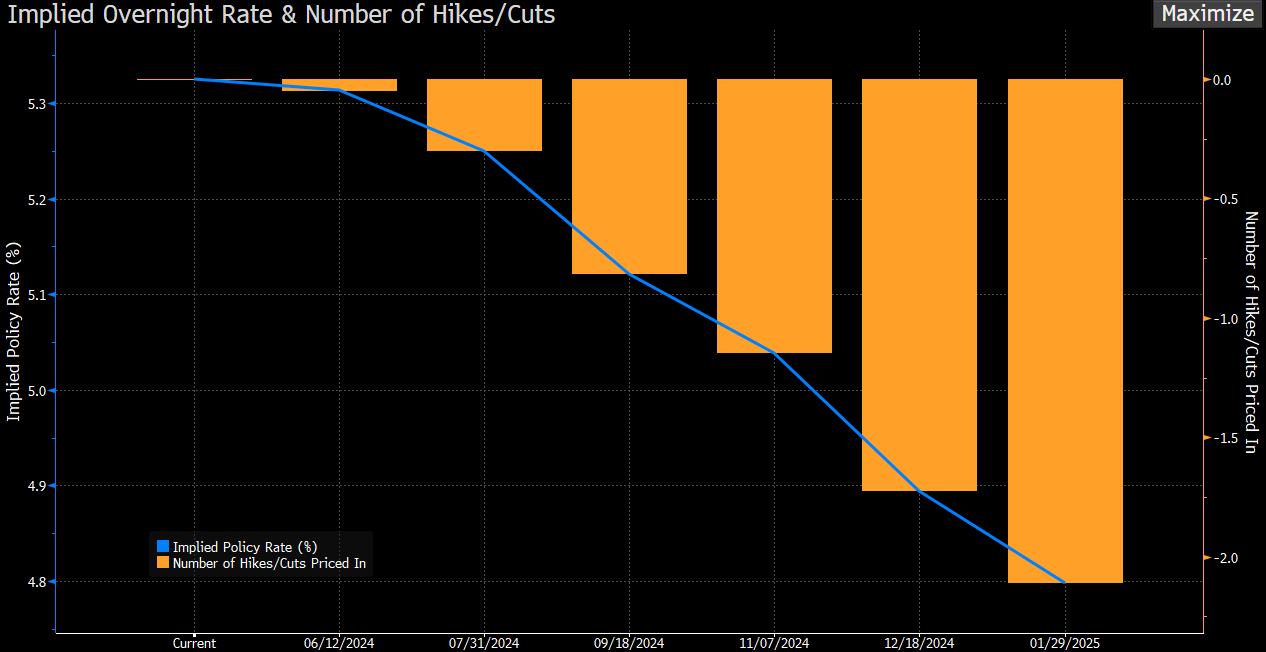

The screenshot above from Bloomberg shows the implied Fed Funds rate based on Fed Funds Futures contracts. This market-based measure indicates the expected path of interest rates over the coming months. Key observations include:

- The market expects a gradual decrease in the Federal Funds Rate from the current level of 5.50% to around 4.80% by early 2025.
- The implied rate path suggests a series of rate cuts, with several meetings expected to result in reductions.

### Market Expectations: FOMC Dot Plot

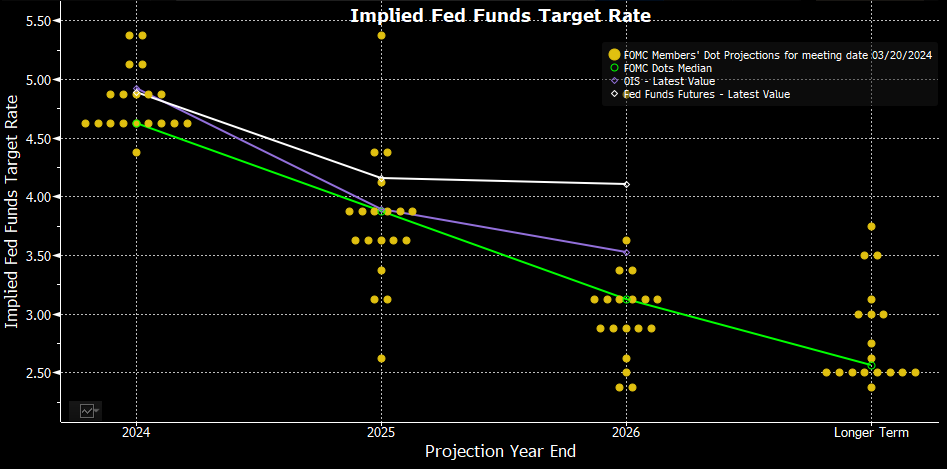

The screenshot above from Bloomberg illustrates the FOMC Dot Plot, which displays the interest rate projections of the Federal Open Market Committee (FOMC) members. Key insights from the Dot Plot include:

- The median projection for the Federal Funds Rate shows a decline from the current level of around 5.50% to below 3.00% over the longer term.
- The FOMC members' projections suggest a more aggressive rate reduction compared to the market expectations reflected in the Fed Funds Futures.

### Comparison to Adjusted Policy Rule Estimates

The adjusted policy rule estimates, visualized in the previous section, suggest a more moderate approach compared to both market expectations and the FOMC projections:

- **Adjusted Taylor Rule (TR)**: Estimates a rate around 5.72%, which is higher than the market and FOMC projections, suggesting a less aggressive easing.
- **Adjusted Balanced Approach Rule (BAR)**: Recommends a rate of 5.87%, indicating a cautious stance on rate reductions.
- **Adjusted Balanced Approach Shortfalls Rule (BASR)**: Suggests a rate of 5.57%, closely aligning with the current FFR but still higher than market and FOMC expectations.
- **Adjusted First Difference Rule (FDR)**: Estimates a rate of 5.64%, which also reflects a more conservative approach compared to the projected rate cuts.

### Implications for Monetary Policy

- **Divergence in Expectations**: The adjusted policy rule estimates suggest that the current FFR should remain relatively stable or only slightly decrease, contrasting with market expectations of significant rate cuts.
- **Policy Considerations**: Policymakers need to balance these rule-based recommendations with market expectations and economic conditions to avoid market disruptions.
- **Strategic Adjustments**: While rule-based estimates provide a structured approach, incorporating real-time data and market sentiment can help in making more informed policy decisions.

This comparison highlights the importance of considering various perspectives and models in formulating monetary policy, ensuring that decisions are well-grounded and responsive to changing economic landscapes.
